In [2]:
%pip install pandas requests numpy matplotlib seaborn scikit-learn

  Using cached pandas-2.3.1-cp313-cp313-macosx_11_0_arm64.whl.metadata (91 kB)
  Using cached requests-2.32.4-py3-none-any.whl.metadata (4.9 kB)
  Using cached numpy-2.3.1-cp313-cp313-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached matplotlib-3.10.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scikit_learn-1.7.0-cp313-cp313-macosx_12_0_arm64.whl.metadata (31 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached urllib3-2.5.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached certifi-2025.7.14-py3-none-any.whl.metadata (2.4 kB)
  Using cached contourpy-1.3.2-cp313-cp313-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-macosx_11_0_arm64.whl.metada

In [1]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')


In [117]:
# Define the list of dataset URLs
datasets = [
    "https://raw.githubusercontent.com/the-eagle-eye/G5_machine_learning/refs/heads/main/dataset_ExamenesLaboratorio_1.csv",
    "https://raw.githubusercontent.com/the-eagle-eye/G5_machine_learning/refs/heads/main/dataset_ExamenesLaboratorio_2.csv",
    "https://raw.githubusercontent.com/the-eagle-eye/G5_machine_learning/refs/heads/main/dataset_ExamenesLaboratorio_3.csv",
    "https://raw.githubusercontent.com/the-eagle-eye/G5_machine_learning/refs/heads/main/dataset_ExamenesLaboratorio_4.csv",
    "https://raw.githubusercontent.com/the-eagle-eye/G5_machine_learning/refs/heads/main/dataset_ExamenesLaboratorio_5.csv"
]

# Initialize an empty list to store individual dataframes
dataframes = []

# Loop through each dataset URL and load into dataframes list
for url in datasets:
    try:
        df = pd.read_csv(url)
        dataframes.append(df)
        print(f"Successfully loaded dataset from {url}")
    except Exception as e:
        print(f"Error loading {url}: {e}")


Successfully loaded dataset from https://raw.githubusercontent.com/the-eagle-eye/G5_machine_learning/refs/heads/main/dataset_ExamenesLaboratorio_1.csv
Successfully loaded dataset from https://raw.githubusercontent.com/the-eagle-eye/G5_machine_learning/refs/heads/main/dataset_ExamenesLaboratorio_2.csv
Successfully loaded dataset from https://raw.githubusercontent.com/the-eagle-eye/G5_machine_learning/refs/heads/main/dataset_ExamenesLaboratorio_3.csv
Successfully loaded dataset from https://raw.githubusercontent.com/the-eagle-eye/G5_machine_learning/refs/heads/main/dataset_ExamenesLaboratorio_4.csv
Successfully loaded dataset from https://raw.githubusercontent.com/the-eagle-eye/G5_machine_learning/refs/heads/main/dataset_ExamenesLaboratorio_5.csv


In [118]:
# Merge all dataframes into a single dataframe
anemia_df = pd.concat(dataframes, axis=0, ignore_index=True)

# Display basic information about the merged dataframe
print(f"\nMerged dataframe has {anemia_df.shape[0]} rows and {anemia_df.shape[1]} columns")
anemia_df.head()


Merged dataframe has 115349 rows and 30 columns


,FECHA_CORTE,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,RED,IPRESS,ID_PACIENTE,EDAD_PACIENTE,SEXO_PACIENTE,...,RESULTADO_1,UNIDADES_1,FEC_RESULTADO_2,PROCEDIMIENTO_2,RESULTADO_2,UNIDADES_2,HEMOGLOBINA,MCH,MCHC,MCV
0,20240531,CALLAO,CALLAO,BELLAVISTA,70102,RED ASISTENCIAL SABOGAL,H.N. ALBERTO SABOGAL SOLOGUREN,eJwzNDU3NzI2NDGwNLUwtrQwNwMAH1gDhg==,80,MASCULINO,...,94.00,mg/dL,20200102,DOSAJE DE CREATININA EN SANGRE,1.18,mg/dL,"12,2","24,8","30,8","97,7"
1,20240531,HUANUCO,HUANUCO,AMARILIS,100102,RED ASISTENCIAL HUANUCO,H.II HUANUCO,eJwzNDUwMTQ2NjIzNzU3tTA2MgQAHsIDcA==,70,FEMENINO,...,0.61,mg/dL,20200107,"DOSAJE DE GLUCOSA EN SANGRE, CUANTITATIVO (EXC...",140.0,mg/dL,"15,9","22,5",29,91
2,20240531,HUANUCO,HUANUCO,AMARILIS,100102,RED ASISTENCIAL HUANUCO,H.II HUANUCO,eJwzNDUwMDYwMjYytzAxNzUyMQQAHl0DZw==,61,MASCULINO,...,1.16,mg/dL,20200108,"DOSAJE DE GLUCOSA EN SANGRE, CUANTITATIVO (EXC...",105.0,mg/dL,"11,3","19,1","27,2","77,7"
3,20240531,HUANUCO,HUANUCO,AMARILIS,100102,RED ASISTENCIAL HUANUCO,H.II HUANUCO,eJwzNLG0MDYzMzEzMDE1sjAxMAAAH4gDdw==,91,MASCULINO,...,1.54,mg/dL,20200108,"DOSAJE DE GLUCOSA EN SANGRE, CUANTITATIVO (EXC...",94.0,mg/dL,"14,9","18,3","30,1","75,6"
4,20240531,HUANUCO,HUANUCO,AMARILIS,100102,RED ASISTENCIAL HUANUCO,H.II HUANUCO,eJwzNDUwMDY2MjAxNrK0NDY3MwEAHmEDbg==,52,MASCULINO,...,9.97,mg/dL,20200125,"DOSAJE DE GLUCOSA EN SANGRE, CUANTITATIVO (EXC...",101.0,mg/dL,"9,8","17,3","30,5","91,1"


In [119]:
anemia_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115349 entries, 0 to 115348
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   FECHA_CORTE             115349 non-null  int64  
 1   DEPARTAMENTO            115349 non-null  object 
 2   PROVINCIA               115349 non-null  object 
 3   DISTRITO                115349 non-null  object 
 4   UBIGEO                  115349 non-null  int64  
 5   RED                     115349 non-null  object 
 6   IPRESS                  115349 non-null  object 
 7   ID_PACIENTE             115349 non-null  object 
 8   EDAD_PACIENTE           115349 non-null  int64  
 9   SEXO_PACIENTE           115349 non-null  object 
 10  EDAD_MEDICO             115349 non-null  int64  
 11  ID_MEDICO               115349 non-null  object 
 12  COD_DIAG                115349 non-null  object 
 13  DIAGNOSTICO             115349 non-null  object 
 14  AREA_HOSPITALARIA   

In [120]:
anemia_df.isnull().sum()

FECHA_CORTE               0
DEPARTAMENTO              0
PROVINCIA                 0
DISTRITO                  0
UBIGEO                    0
RED                       0
IPRESS                    0
ID_PACIENTE               0
EDAD_PACIENTE             0
SEXO_PACIENTE             0
EDAD_MEDICO               0
ID_MEDICO                 0
COD_DIAG                  0
DIAGNOSTICO               0
AREA_HOSPITALARIA         0
SERVICIO_HOSPITALARIO     0
ACTIVIDAD_HOSPITALARIA    0
FECHA_MUESTRA             0
FEC_RESULTADO_1           0
PROCEDIMIENTO_1           0
RESULTADO_1               0
UNIDADES_1                0
FEC_RESULTADO_2           0
PROCEDIMIENTO_2           0
RESULTADO_2               0
UNIDADES_2                0
HEMOGLOBINA               0
MCH                       0
MCHC                      0
MCV                       0
dtype: int64

In [ ]:
anemia_df['HEMOGLOBINA'] = anemia_df['HEMOGLOBINA'].astype(str).str.replace(',', '.').astype(float)
anemia_df['MCH'] = anemia_df['MCH'].astype(str).str.replace(',', '.').astype(float)
anemia_df['MCHC'] = anemia_df['MCHC'].astype(str).str.replace(',', '.').astype(float)
anemia_df['MCV'] = anemia_df['MCV'].astype(str).str.replace(',', '.').astype(float)


,FECHA_CORTE,UBIGEO,EDAD_PACIENTE,EDAD_MEDICO,FECHA_MUESTRA,FEC_RESULTADO_1,RESULTADO_1,FEC_RESULTADO_2,HEMOGLOBINA,MCH,MCHC,MCV
count,115349.0,115349.000000,115349.000000,115349.000000,1.153490e+05,1.153490e+05,115349.000000,1.153490e+05,115349.000000,115349.000000,115349.000000,115349.000000
mean,20240531.0,131023.910732,66.370294,46.517430,2.022426e+07,2.022427e+07,40.570421,2.022427e+07,12.492889,21.990829,29.004592,85.545911
std,0.0,57039.229998,15.461049,9.544202,1.144138e+04,1.143932e+04,66.047166,1.143950e+04,2.542406,3.988446,1.100855,8.944622
min,20240531.0,10101.000000,0.000000,23.000000,2.020010e+07,2.020010e+07,0.000000,2.020010e+07,8.100000,15.100000,27.100000,70.000000
25%,20240531.0,80101.000000,58.000000,39.000000,2.022022e+07,2.022022e+07,1.370000,2.022022e+07,10.300000,18.500000,28.100000,77.800000
50%,20240531.0,150101.000000,69.000000,46.000000,2.023013e+07,2.023020e+07,4.950000,2.023020e+07,12.500000,22.000000,29.000000,85.600000
75%,20240531.0,150142.000000,77.000000,53.000000,2.023093e+07,2.023093e+07,88.000000,2.023093e+07,14.700000,25.400000,30.000000,93.300000
max,20240531.0,250107.000000,105.000000,75.000000,2.024043e+07,2.024043e+07,997.000000,2.024043e+07,16.900000,28.900000,30.900000,101.000000


In [125]:
anemia_df['anemia_flag'] = np.where(
    ((anemia_df['SEXO_PACIENTE']=='MASCULINO') & (anemia_df['HEMOGLOBINA']<13)) | ((anemia_df['SEXO_PACIENTE']=='FEMENINO') & (anemia_df['HEMOGLOBINA']<12)),
    1,0
)

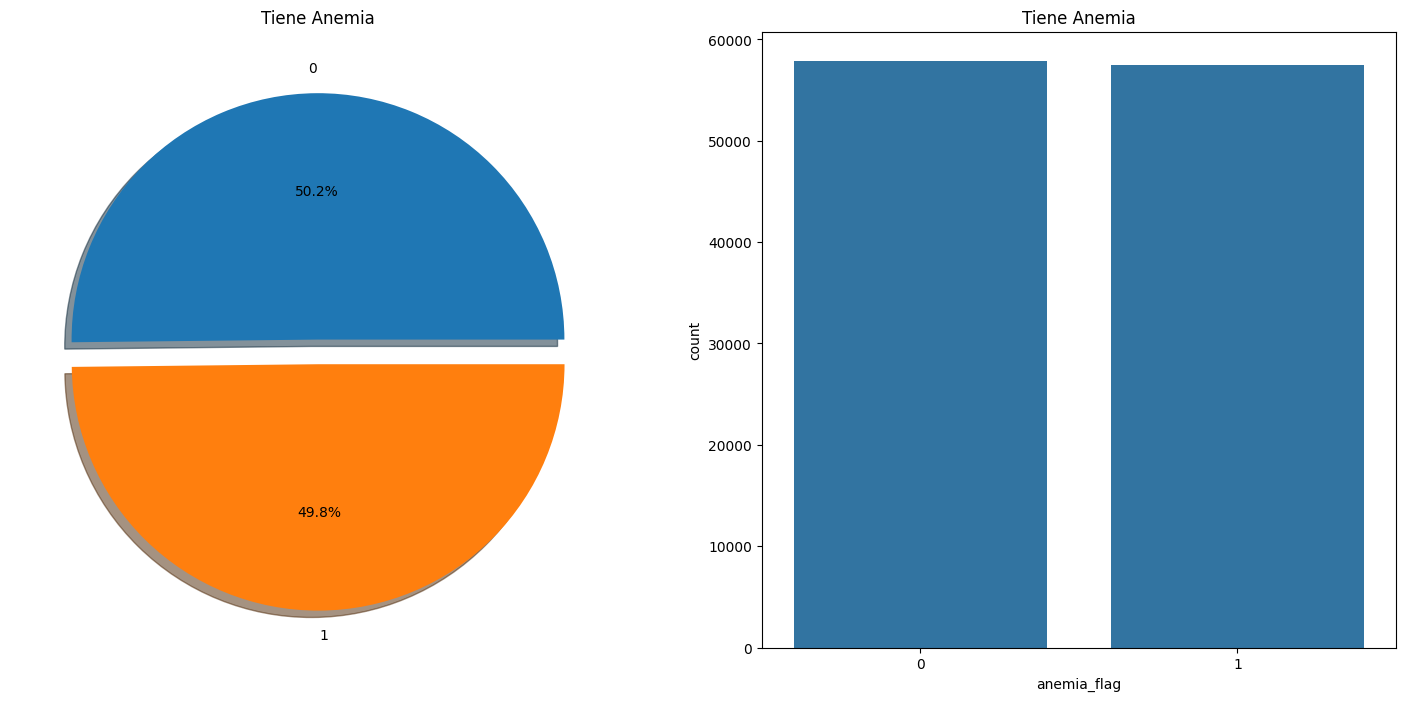

In [126]:
f,ax=plt.subplots(1,2,figsize=(18,8))
anemia_df['anemia_flag'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Tiene Anemia')
ax[0].set_ylabel('')
sns.countplot(x='anemia_flag', data=anemia_df, ax=ax[1])
ax[1].set_title('Tiene Anemia')
plt.show()

No outliers found in FECHA_CORTE
No outliers found in UBIGEO


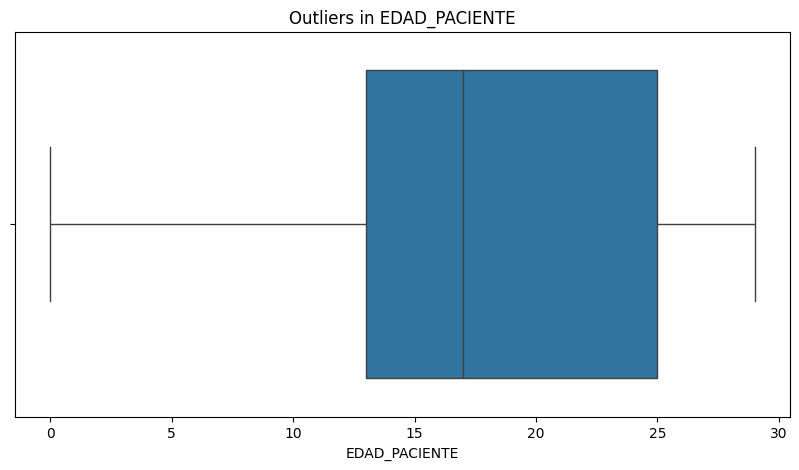

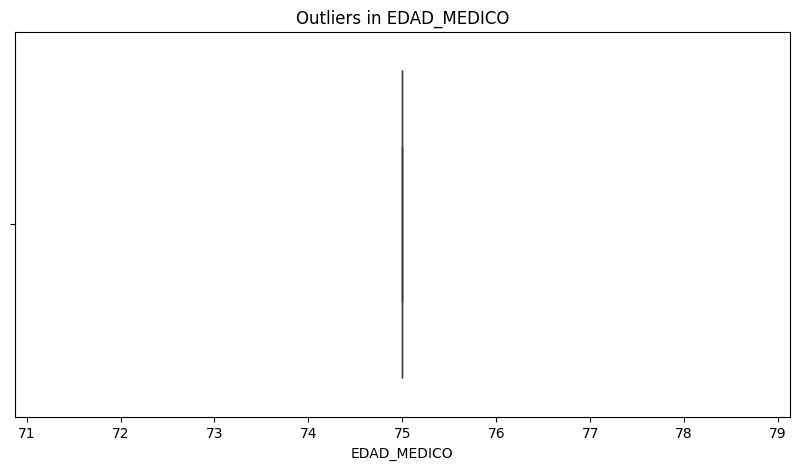

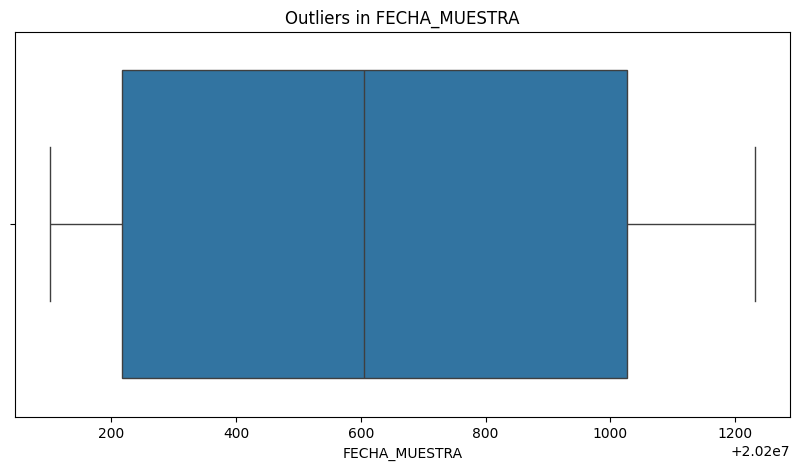

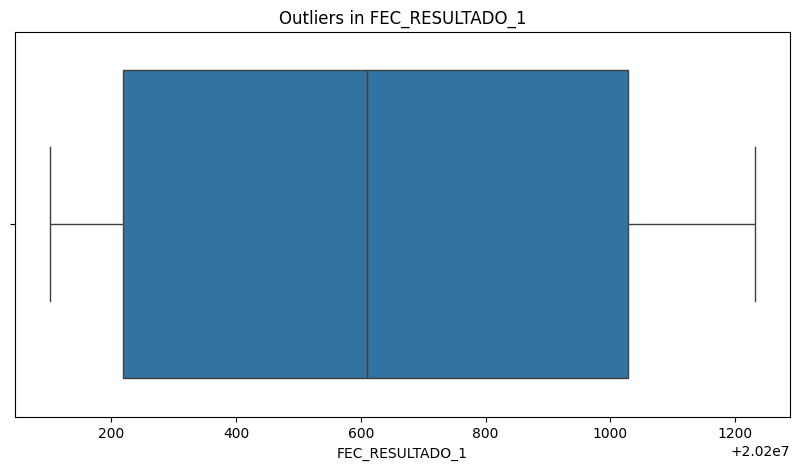

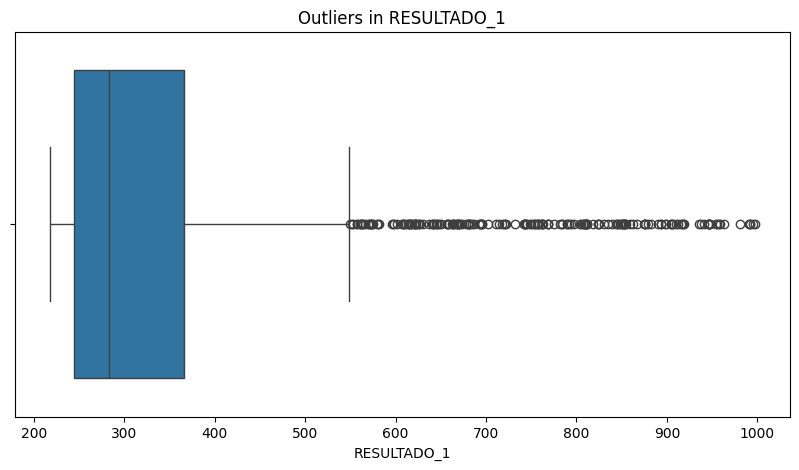

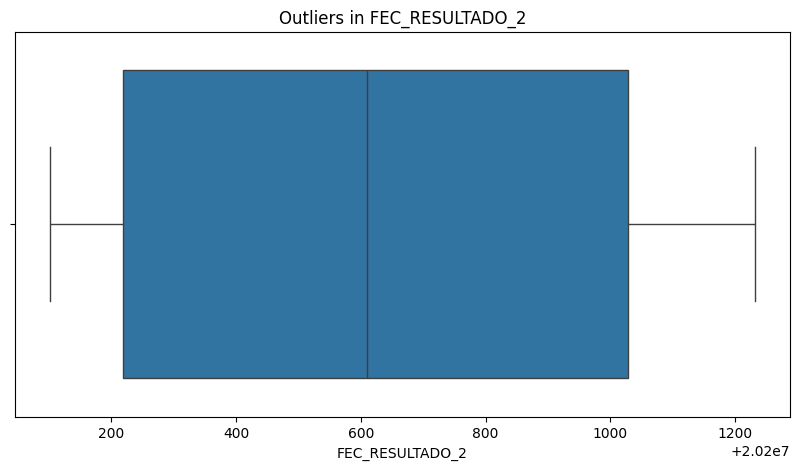

No outliers found in HEMOGLOBINA
No outliers found in MCH
No outliers found in MCHC
No outliers found in MCV
No outliers found in anemia_flag


In [127]:
# Create a method to check for outlier values in any of the features
def check_outliers(df):
    outliers = {}
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

## check for outliers in the anemia_df and print in a graph of the outliers
outliers = check_outliers(anemia_df)
for col, outlier_df in outliers.items():
    if not outlier_df.empty:
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=outlier_df[col])
        plt.title(f'Outliers in {col}')
        plt.show()
    else:
        print(f"No outliers found in {col}")

In [128]:
anemia_df.groupby(['SEXO_PACIENTE','anemia_flag'])['anemia_flag'].count()

SEXO_PACIENTE  anemia_flag
FEMENINO       0              30102
               1              23375
MASCULINO      0              27772
               1              34100
Name: anemia_flag, dtype: int64

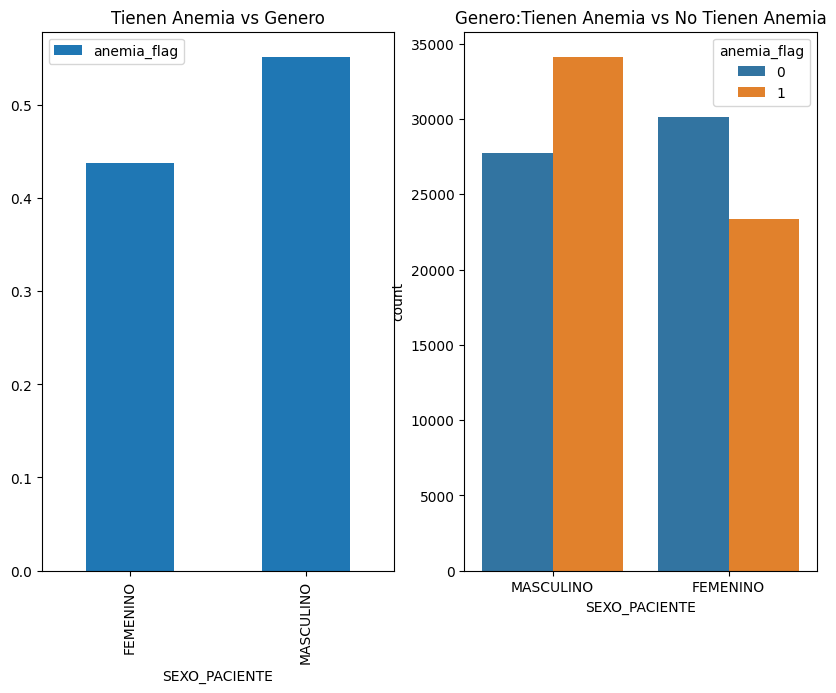

In [129]:
f,ax=plt.subplots(1,2,figsize=(10,7))
anemia_df[['SEXO_PACIENTE','anemia_flag']].groupby(['SEXO_PACIENTE']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Tienen Anemia vs Genero')
sns.countplot(x='SEXO_PACIENTE', hue='anemia_flag', data=anemia_df, ax=ax[1])
ax[1].set_title('Genero:Tienen Anemia vs No Tienen Anemia')
plt.show()


In [130]:
# See the min, max, mean values
# Traducir al espanol
print('El hemoglobina más alta fue de:',anemia_df['HEMOGLOBINA'].max())
print('El hemoglobina más baja fue de:',anemia_df['HEMOGLOBINA'].min())
print('El hemoglobina promedio en los datos:',anemia_df['HEMOGLOBINA'].mean())

El hemoglobina más alta fue de: 16.9
El hemoglobina más baja fue de: 8.1
El hemoglobina promedio en los datos: 12.492888538262143


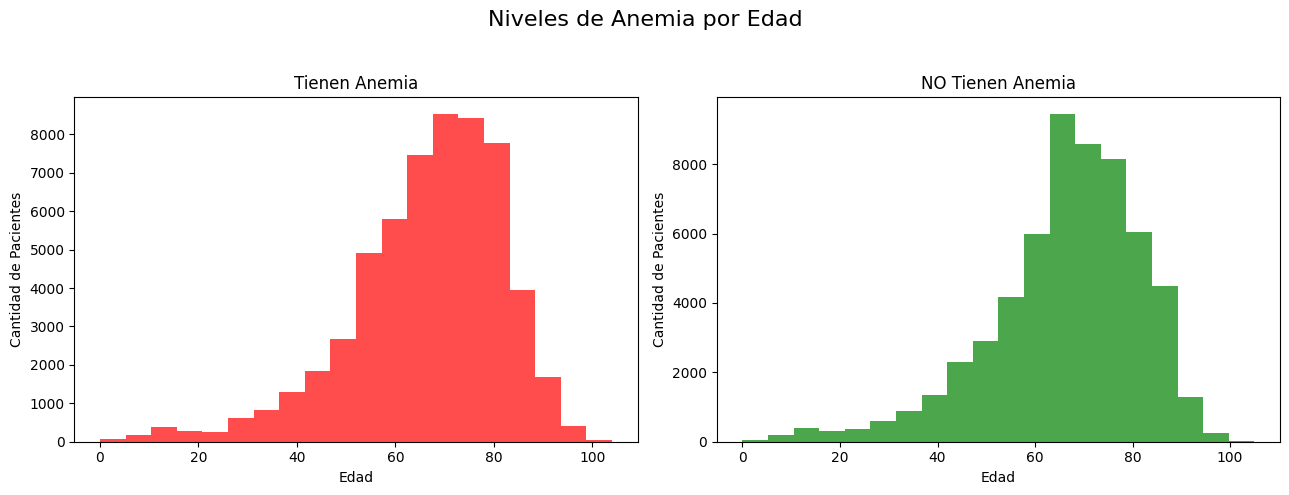

In [131]:
# Crear un histograma para que se muestra los niveles de anemia por edad EDAD_PACIENTE
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

# Histogram for patients with anemia
anemia_ages = anemia_df[anemia_df['anemia_flag']==1]['EDAD_PACIENTE']
ax1.hist(anemia_ages, bins=20, color='red', alpha=0.7)
ax1.set_title('Tienen Anemia')
ax1.set_xlabel('Edad')
ax1.set_ylabel('Cantidad de Pacientes')

# Histogram for patients without anemia
no_anemia_ages = anemia_df[anemia_df['anemia_flag']==0]['EDAD_PACIENTE']
ax2.hist(no_anemia_ages, bins=20, color='green', alpha=0.7)
ax2.set_title('NO Tienen Anemia')
ax2.set_xlabel('Edad')
ax2.set_ylabel('Cantidad de Pacientes')

# Main title
fig.suptitle('Niveles de Anemia por Edad', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the title
plt.show()


In [132]:
# See the min, max, mean values
print('El MCH más alto fue de:',anemia_df['MCH'].max())
print('El MCH más bajo fue de:',anemia_df['MCH'].min())
print('El MCH promedio en los datos:',anemia_df['MCH'].mean())


El MCH más alto fue de: 28.9
El MCH más bajo fue de: 15.1
El MCH promedio en los datos: 21.990828702459492


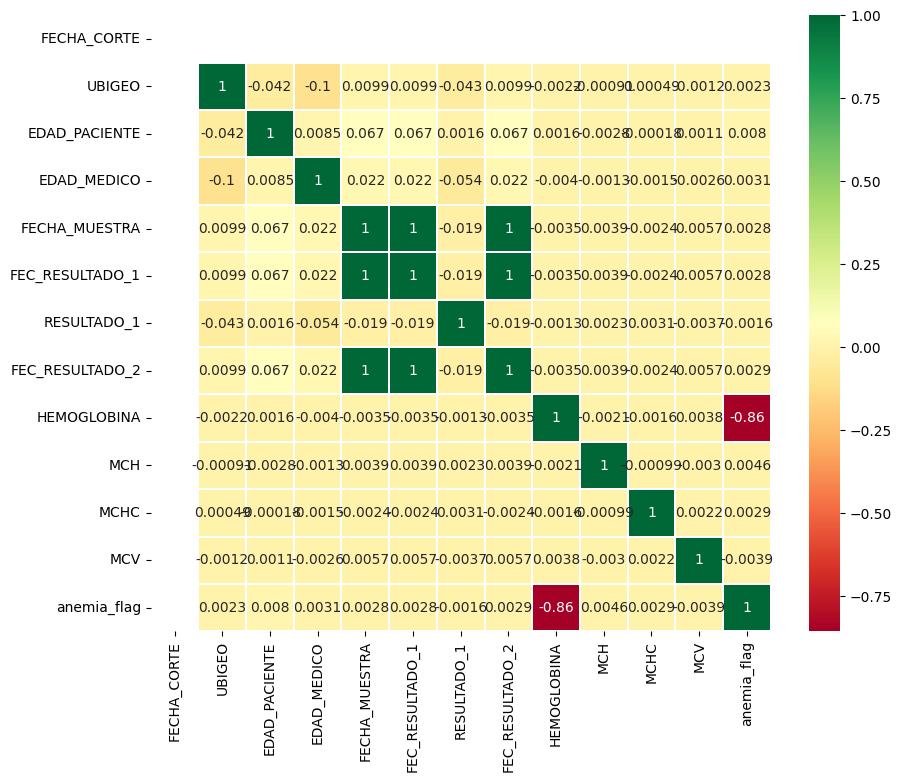

In [133]:
# numerical columns
anemia_df = anemia_df.select_dtypes(include=['float64', 'int64'])

sns.heatmap(anemia_df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [137]:
from sklearn import preprocessing
import pandas as pd

d = preprocessing.normalize(anemia_df.iloc[:,1:5], axis=0)
anemia_scaler_df = pd.DataFrame(d, columns=["HEMOGLOBINA", "MCH", "MCHC", "MCV"])
anemia_scaler_df.head()
anemia_scaler_df.describe()

,HEMOGLOBINA,MCH,MCHC,MCV
count,115349.000000,115349.000000,115349.000000,115349.000000
mean,0.002700,0.002868,0.002884,0.002944
std,0.001175,0.000668,0.000592,0.000002
min,0.000208,0.000000,0.001426,0.002941
25%,0.001650,0.002506,0.002418,0.002944
50%,0.003093,0.002981,0.002852,0.002945
75%,0.003094,0.003327,0.003286,0.002945
max,0.005153,0.004537,0.004650,0.002947


In [138]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [ ]:
train,test=train_test_split(anemia_df,test_size=0.3,random_state=0,stratify=anemia_df['anemia_flag'])
train_X=train[train.columns[:-1]]
train_Y=train[train.columns[-1:]]
test_X=test[test.columns[:-1]]
test_Y=test[test.columns[-1:]]
X=anemia_df[anemia_df.columns[:-1]]
Y=anemia_df['anemia_flag']
len(train_X), len(train_Y), len(test_X), len(test_Y)

(700, 700, 300, 300)

In [149]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is  0.5466666666666666


In [143]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.5466666666666666


In [ ]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

In [ ]:
model=KNeighborsClassifier() 
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))


In [ ]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

In [ ]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

In [ ]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10) # k=10, split the data into 10 equal parts
cv_mean=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    cv_mean.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':cv_mean,'Std':std},index=classifiers)       
new_models_dataframe2

In [ ]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

In [ ]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=5),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

In [ ]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=5)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ], 
                       voting='soft').fit(train_X,train_Y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
print('The cross validated score is :',cross.mean())

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

In [ ]:
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())